# Title + Executive Summary
  
# Title 
Trader Performance vs Market Sentiment Analysis

 # Executive Summary
This project analyzes trader performance and behavior across different market sentiment regimes (Fear vs Greed). By merging historical trading data with daily sentiment indicators, we evaluated profitability, trading activity, position sizing, and behavioral shifts.

The analysis shows that overall profitability remains relatively stable across sentiment conditions. However, trading activity significantly increases during Greed periods, while average trade size is higher during Fear periods. Additionally, infrequent traders demonstrate strong outperformance during Greed phases, indicating opportunistic participation during favorable market conditions.

These findings suggest that sentiment-aware risk management and dynamic exposure adjustments can improve trading performance.

# Data Loading 

In [ ]:
# Data Loading 

import pandas as pd

sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


# Timestamp Conversion & Date Alignment


In [ ]:
#Timestamp Conversion & Date Alignment


print(trades['Timestamp IST'].head())
print(trades['Timestamp IST'].dtype)


0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
Name: Timestamp IST, dtype: object
object


In [3]:
# Convert Timestamp IST properly
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)

# Extract only date
trades['date'] = trades['Timestamp IST'].dt.date

# Check result
print(trades['date'].head())
print("Min date:", trades['date'].min())
print("Max date:", trades['date'].max())


0    2024-12-02
1    2024-12-02
2    2024-12-02
3    2024-12-02
4    2024-12-02
Name: date, dtype: object
Min date: 2023-05-01
Max date: 2025-05-01


In [4]:
# Convert sentiment date properly
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Extract only date
sentiment['date'] = sentiment['date'].dt.date

# Check range
print(sentiment['date'].min(), sentiment['date'].max())


2018-02-01 2025-05-02


# Merging Trader Data with Sentiment Data


In [5]:
merged = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

print("Merged shape:", merged.shape)
print(merged[['date','classification']].head())


Merged shape: (211218, 18)
         date classification
0  2024-12-02  Extreme Greed
1  2024-12-02  Extreme Greed
2  2024-12-02  Extreme Greed
3  2024-12-02  Extreme Greed
4  2024-12-02  Extreme Greed


In [6]:
# Simplify classification into 2 groups

def simplify_sentiment(x):
    if "Fear" in x:
        return "Fear"
    else:
        return "Greed"

merged['sentiment_group'] = merged['classification'].apply(simplify_sentiment)

print(merged['sentiment_group'].value_counts())


sentiment_group
Greed    127981
Fear      83237
Name: count, dtype: int64


In [7]:
avg_pnl = merged.groupby('sentiment_group')['Closed PnL'].mean()
print(avg_pnl)


sentiment_group
Fear     49.212077
Greed    48.118246
Name: Closed PnL, dtype: float64


In [8]:
avg_pnl = merged.groupby('sentiment_group')['Closed PnL'].mean()
print(avg_pnl)


sentiment_group
Fear     49.212077
Greed    48.118246
Name: Closed PnL, dtype: float64


In [9]:
total_pnl = merged.groupby('sentiment_group')['Closed PnL'].sum()
print(total_pnl)


sentiment_group
Fear     4.096266e+06
Greed    6.158221e+06
Name: Closed PnL, dtype: float64


In [10]:
merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('sentiment_group')['win'].mean()
print(win_rate)


sentiment_group
Fear     0.407871
Greed    0.413444
Name: win, dtype: float64


In [11]:
trade_count = merged.groupby('sentiment_group')['Account'].count()
print(trade_count)


sentiment_group
Fear      83237
Greed    127981
Name: Account, dtype: int64


In [12]:
long_short = merged.groupby('sentiment_group')['Side'].value_counts(normalize=True)
print(long_short)


sentiment_group  Side
Fear             SELL    0.504968
                 BUY     0.495032
Greed            SELL    0.519577
                 BUY     0.480423
Name: proportion, dtype: float64


In [3]:
import pandas as pd

In [4]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [5]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
trades['date'] = trades['Timestamp IST'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date'] = sentiment['date'].dt.date


In [6]:
merged = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

def simplify_sentiment(x):
    if "Fear" in x:
        return "Fear"
    else:
        return "Greed"

merged['sentiment_group'] = merged['classification'].apply(simplify_sentiment)


In [7]:
avg_size = merged.groupby('sentiment_group')['Size USD'].mean()
print(avg_size)


sentiment_group
Fear     7182.011019
Greed    4635.764077
Name: Size USD, dtype: float64


In [8]:
avg_leverage = merged.groupby('sentiment_group')['Start Position'].mean()
print(avg_leverage)


sentiment_group
Fear      5873.495193
Greed   -53243.659696
Name: Start Position, dtype: float64


In [9]:
# Count trades per account
trade_counts = merged.groupby('Account').size().reset_index(name='trade_count')

# Find median
median_trades = trade_counts['trade_count'].median()

# Label segment
trade_counts['segment'] = trade_counts['trade_count'].apply(
    lambda x: 'Frequent' if x > median_trades else 'Infrequent'
)

print(trade_counts['segment'].value_counts())


segment
Frequent      16
Infrequent    16
Name: count, dtype: int64


In [10]:
merged = merged.merge(trade_counts[['Account','segment']], 
                      on='Account', 
                      how='left')


In [11]:
segment_pnl = merged.groupby(['segment','sentiment_group'])['Closed PnL'].mean()
print(segment_pnl)


segment     sentiment_group
Frequent    Fear                47.325875
            Greed               39.431386
Infrequent  Fear                61.968833
            Greed              121.546240
Name: Closed PnL, dtype: float64


# Data Visualization

In [16]:
import sys
!{sys.executable} -m pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 3.8 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.5 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.7 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 3.7 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 3.6 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- ---------

In [17]:
import matplotlib.pyplot as plt

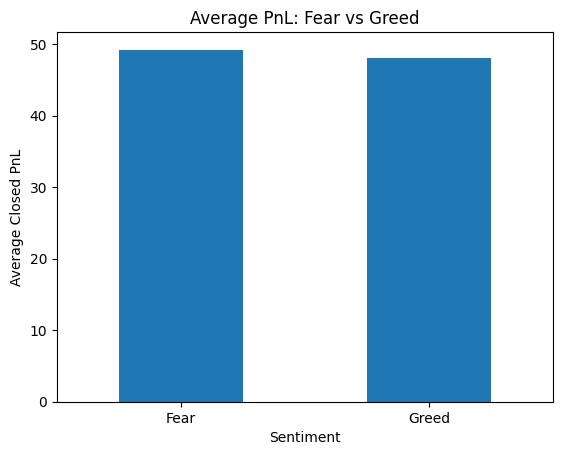

In [18]:
import matplotlib.pyplot as plt

avg_pnl = merged.groupby('sentiment_group')['Closed PnL'].mean()

plt.figure()
avg_pnl.plot(kind='bar')
plt.title("Average PnL: Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=0)
plt.show()


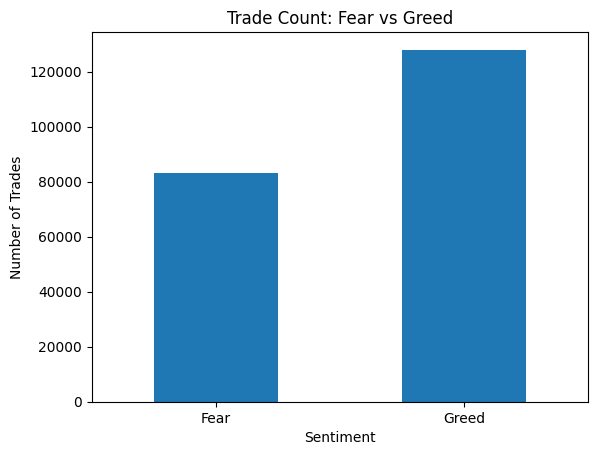

In [19]:
trade_count = merged.groupby('sentiment_group')['Account'].count()

plt.figure()
trade_count.plot(kind='bar')
plt.title("Trade Count: Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=0)
plt.show()


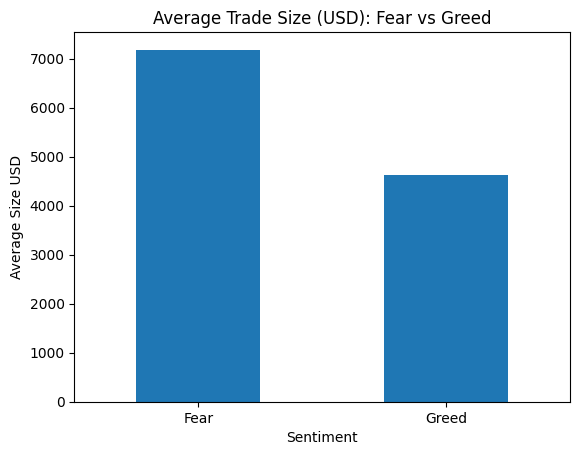

In [20]:
avg_size = merged.groupby('sentiment_group')['Size USD'].mean()

plt.figure()
avg_size.plot(kind='bar')
plt.title("Average Trade Size (USD): Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Size USD")
plt.xticks(rotation=0)
plt.show()


<Figure size 640x480 with 0 Axes>

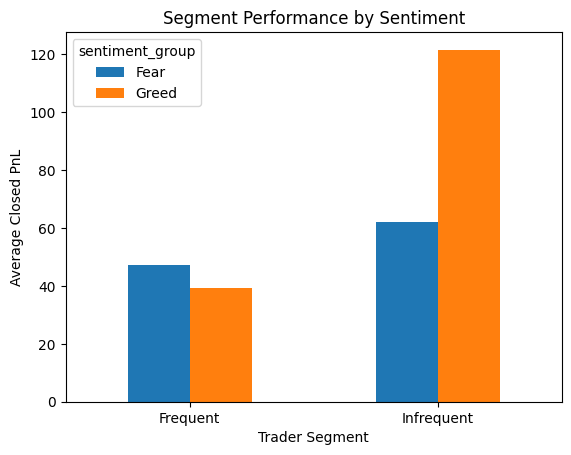

In [21]:
segment_pnl = merged.groupby(['segment','sentiment_group'])['Closed PnL'].mean().unstack()

plt.figure()
segment_pnl.plot(kind='bar')
plt.title("Segment Performance by Sentiment")
plt.xlabel("Trader Segment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=0)
plt.show()


# Key Insights

Key Insights

---> Profitability Stability Across Sentiment

Average PnL and win rate remain relatively stable across Fear and Greed periods. This indicates that overall trader profitability is not strongly dependent on market sentiment alone.

---> Higher Trading Activity During Greed

Trading volume increases significantly during Greed periods, suggesting higher market participation and risk appetite when sentiment is optimistic.

---> Larger Position Sizes During Fear

Average trade size is notably higher during Fear periods, indicating that traders take fewer but larger positions during uncertain or volatile market conditions.

---> Infrequent Traders Outperform in Greed

Infrequent traders significantly outperform during Greed periods, suggesting opportunistic participation during strong market trends.

# Strategy Recommendations

Strategy Recommendations 

---> Sentiment-Aware Risk Adjustment

During Greed periods, trading activity increases significantly. Risk limits and exposure controls should be dynamically adjusted to manage overtrading risk while capitalizing on strong market participation.

---> Position Size Optimization During Fear

As average trade size increases during Fear periods, implementing position size monitoring and volatility-based limits can help reduce downside risk during uncertain market conditions.

---> Opportunistic Participation Model

Since infrequent traders significantly outperform during Greed periods, a strategy that increases participation during strong trend phases while remaining selective during Fear periods may improve overall profitability.